**Warm-up Challenge**: Catalan numbers<br>
The Catalan numbers $C_n$ are a sequence of integers 1, 1, 2, 5, 14, 42, 132... that play an important role in quantum mechanics and the theory of disordered systems. (They were central to Eugene Wigner’s proof of the so-called semicircle law.) They are given by <br>$$C_0=1$$
$$C_{n+1}=\frac{4n+2}{n+2}Cn.$$ Write a program that prints in increasing order all Catalan numbers less than or equal to one billion.

### Goals
- #### model 1D motion with drag
- #### Model 2D motion
- #### Model 2d motion with drag

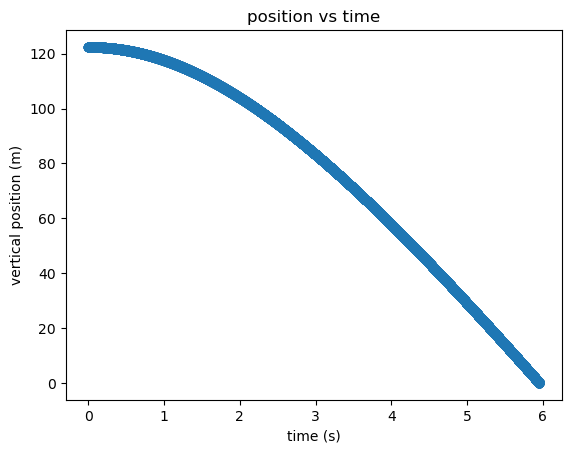

Time to land =  5.953999999999462 s


In [1]:
#Falling object

import numpy as np
import matplotlib.pyplot as plt

#define knowns
m = 1 #kg
g = 9.8 #N/kg

rho = 1.225 #kg/m^3
Cd = 0.47 #unitless
r = 0.1 #m
A = r**2 * np.pi


#starting positions
y = 122.5 #m above the ground
v = 0 #m/s starting velocity
t = 0 #s starting time
dt = 0.0001 #s time step

#creating lists to track the position and time over time
ylist = [y]
tlist = [t]

while ylist[-1] >= 0: #code will run while the ball is above or at the ground. stops when ball is below ground
    
    Fnet = 0.5*rho*(v**2)*Cd*A-m*g #calculating the net force 
    a = Fnet / m #calculating acceleration due to Newton's 2nd Law
    
    v = v + a * dt #updating velocity by incremental change (EC method)
    y = y + v * dt #updating vertical position by incremental change (EC method)
    t = t + dt     #updating time by incremental change

    #updating lists
    ylist.append(y)
    tlist.append(t)

#graph it out
plt.scatter(tlist,ylist)
plt.title('position vs time')
plt.xlabel('time (s)')
plt.ylabel('vertical position (m)')
plt.show()

print('Time to land = ',tlist[-1],'s')

5.4999999999999964 s


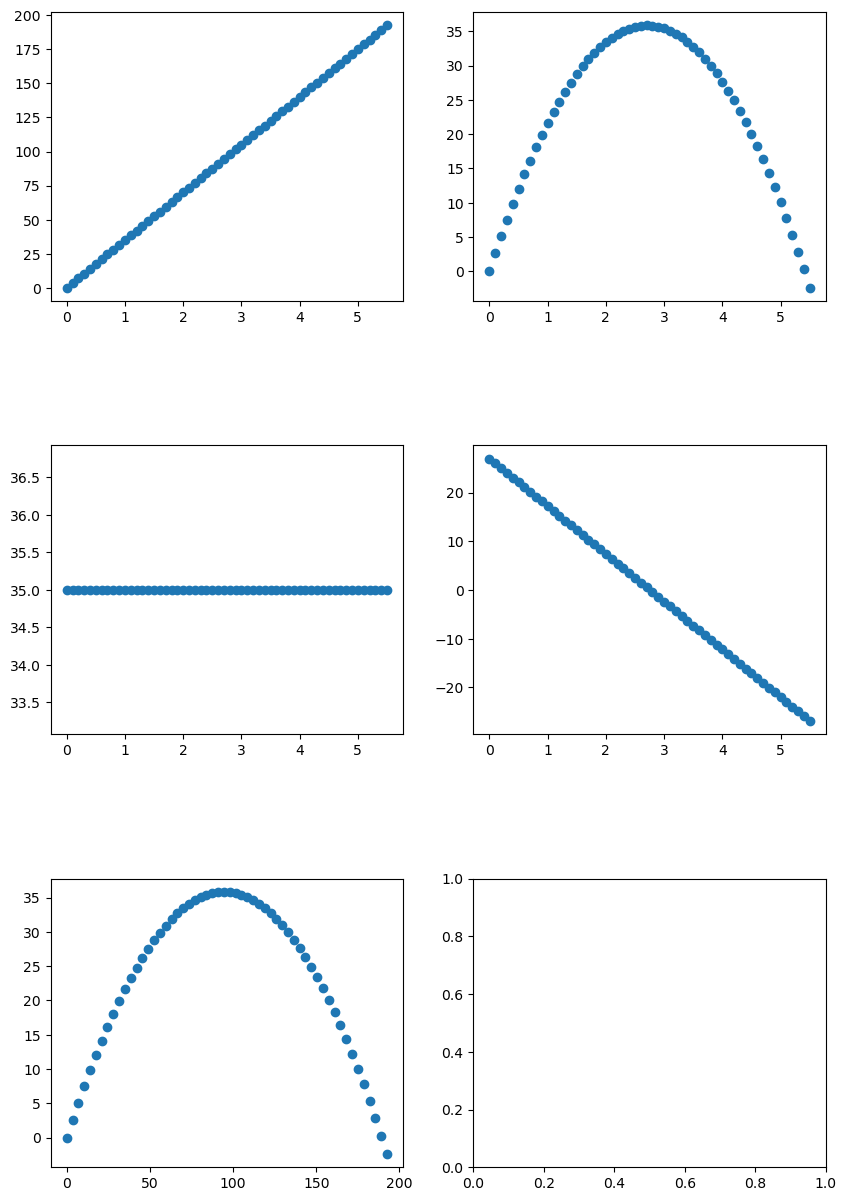

In [5]:
#Projectile without drag
import numpy as np
import matplotlib.pyplot as plt

#knowns
m = 1 #kg
g = np.array([0,-9.8]) #N/kg, gravitational field strength

pos = np.array([0,0]) #m
v = np.array([35,27]) #m/s

t = 0 #s starting time
dt = 0.1 #s time step

#creating lists to track the position and time over time
ylist = [pos[1]] #m
xlist = [pos[0]] #m
vxlist = [v[0]] #m/s
vylist = [v[1]] #m/s
tlist = [t] #s 

while ylist[-1] >= 0: #code will run while the ball is above or at the ground. stops when ball is below ground
    
    Fnet = m*g #calculating the net force 
    a = Fnet / m #calculating acceleration due to Newton's 2nd Law
    
    v = v + a * dt #updating velocity by incremental change (EC method)
    pos = pos + v * dt #updating vertical position by incremental change (EC method)
    t = t + dt     #updating time by incremental change

    #updating lists
    xlist.append(pos[0])
    ylist.append(pos[1])
    vxlist.append(v[0])
    vylist.append(v[1])
    tlist.append(t)

    
fig, ax = plt.subplots(3, 2, figsize=(10,15))
fig.subplots_adjust(hspace=0.5)

ax[0,0].scatter(tlist,xlist)
ax[0,1].scatter(tlist,ylist)
ax[1,0].scatter(tlist,vxlist)
ax[1,1].scatter(tlist,vylist)
ax[2,0].scatter(xlist,ylist)

print(tlist[-1],'s')


4.200000000000001 s


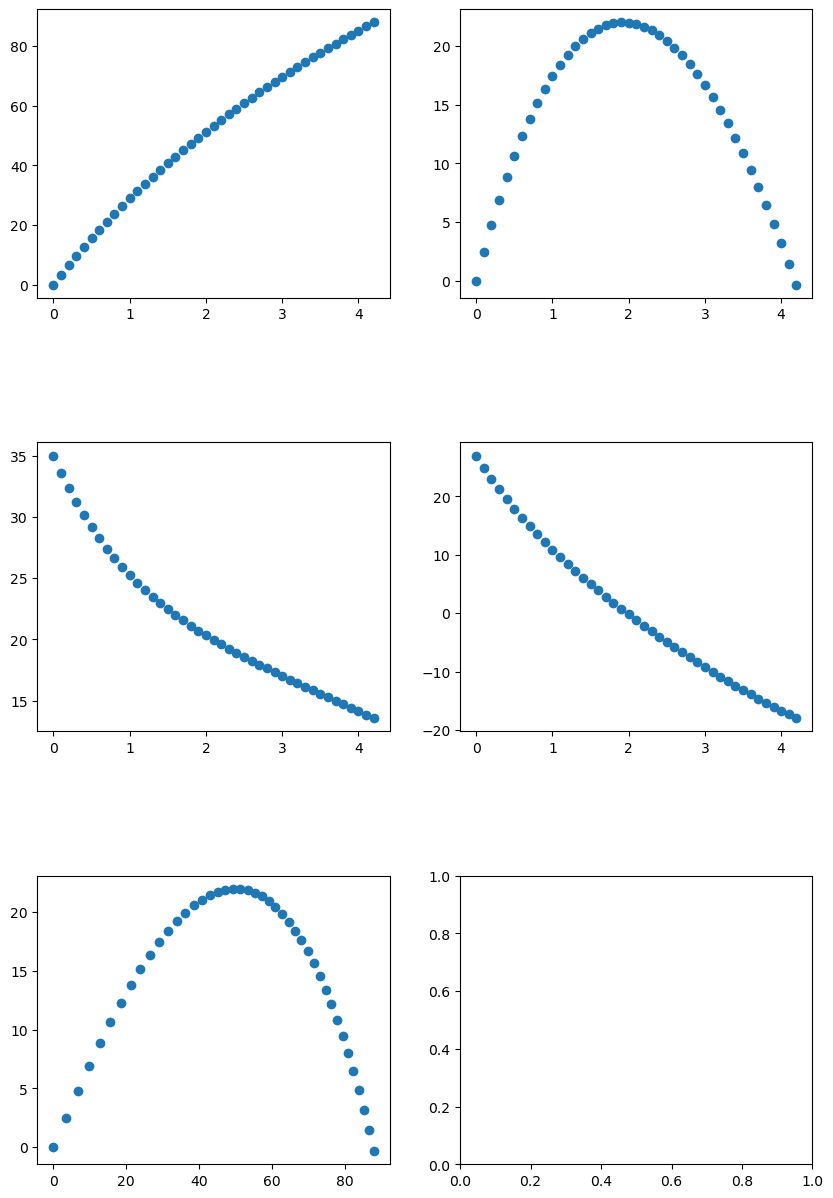

In [1]:
#Projectile with drag
import numpy as np
import matplotlib.pyplot as plt

#knowns
m = 1 #kg
g = np.array([0,-9.8]) #N/kg, gravitational field strength

rho = 1.225 #kg/m^3
Cd = 0.47 #unitless
r = 0.1 #m
A = r**2 * np.pi

pos = np.array([0,0]) #m
v = np.array([35,27]) #m/s

t = 0 #s starting time
dt = 0.1 #s time step

#creating lists to track the position and time over time
ylist = [pos[1]] #m
xlist = [pos[0]] #m
vxlist = [v[0]] #m/s
vylist = [v[1]] #m/s
tlist = [t] #s 

while ylist[-1] >= 0: #code will run while the ball is above or at the ground. stops when ball is below ground
    vix = vxlist[-1]
    viy = vylist[-1]
    vi = np.array([vix,viy]) #made new variable initial velocity at start of loop
    vmag = np.linalg.norm(vi) #calculates magnitude of velocity
    vhat = vi / vmag

    posi = np.array([xlist[-1],ylist[-1]]) #defining initial position
    
    Fnet = m*g + .5*rho*Cd*A*(vmag**2)*(-vhat) #calculating the net force 
    a = Fnet / m #calculating acceleration due to Newton's 2nd Law
    
    vf = vi + a * dt #updating velocity by incremental change (EC method)
    posf = posi + vf * dt #updating vertical position by incremental change (EC method)
    t = t + dt     #updating time by incremental change

    #updating lists
    xlist.append(posf[0])
    ylist.append(posf[1])
    vxlist.append(vf[0])
    vylist.append(vf[1])
    tlist.append(t)

    
fig, ax = plt.subplots(3, 2, figsize=(10,15))
fig.subplots_adjust(hspace=0.5)

ax[0,0].scatter(tlist,xlist)
ax[0,1].scatter(tlist,ylist)
ax[1,0].scatter(tlist,vxlist)
ax[1,1].scatter(tlist,vylist)
ax[2,0].scatter(xlist,ylist)

print(tlist[-1],'s')
